<a href="https://colab.research.google.com/github/Shaikmd3797/find-best-model-for-social-network-on-ADs-dataset/blob/main/Best_model_for_SOCIAL_NETWORK_ADS_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Finding the best model for Social network ads dataset.***

 # ***AIM:***
     
*  # *Finding the best model for social network Ads.*


1.  *data cleaning.*
2.  *label encoding.*
3.  *EDA for dataset.*
4.  *splitting of data*
5.  *scaling of the data*
6.  *build the model* 

 *   Logistic regression algorithm
 *   KNN classifier algorithm
 *   Decision tree classifier algorithm

7.  *evaluate the model*

 *   evaluation of Logistic regression algorithm
 *   evaluation of KNN classifier algorithm
 *   evaluation of Decision tree classifier algorithm








# ***i)  ASSIGNMENT -11 (DATA PREPROCESSING)***

# **1. Data Cleaning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
df=df.drop('User ID',axis=1) # UserID is not a matter for purchasing. Droping UserID will not affecting the result.

In [7]:
def data_cleaning(data,target):
  data=data.dropna() # drop null values from dataset
  data=data.drop_duplicates() # drop duplicate rows from 
  numerics=['int16','int32','int64']
  data_numeric=data.select_dtypes(include=numerics)
  col_num=[]
  for i in data_numeric.columns:
    if i != target:
      col_num.append(i)
  for j in col_num:      # outliers detection from dataset
    q1=data[j].quantile(0.25)  # 25 th quantile
    q3=data[j].quantile(0.75)  # 75 th quantile
    iqr= q3-q1  #iqr value
    upper= q3+1.5 * iqr
    lower = q1-1.5* iqr
    data[j]=data[j].clip(lower, upper) # the values are outliers which is out of range
  return data

In [8]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [9]:
df_clean=data_cleaning(df,'Purchased')
df_clean.describe()

,Age,EstimatedSalary,Purchased
count,380.000000,380.000000,380.000000
mean,37.586842,70421.052632,0.368421
std,10.592492,34604.155483,0.483012
min,18.000000,15000.000000,0.000000
25%,29.000000,43000.000000,0.000000
50%,37.000000,70500.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [10]:
df_clean.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


# **Checking the imbalance**

In [11]:
def check_imbalance(data,target):
  count_data=pd.DataFrame(data[target].value_counts()).reset_index()
  count_data.columns=[target,'count']
  count_data['percentage']=(count_data['count']/sum(count_data['count']))*100
  count_data.columns=[target,'count','percentage']
  return count_data

In [12]:
count_df=check_imbalance(df_clean,'Purchased')
count_df

,Purchased,count,percentage
0,0,240,63.157895
1,1,140,36.842105


# *data is balanced.*

# **2. label encoding**

In [13]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df_clean['Gender']=encode.fit_transform(df_clean['Gender'])
df_clean

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


# **3. EDA of dataset**

In [14]:
features=[]
for i in df_clean.columns:
  if i != 'Purchased':
    features.append(i)
features

['Gender', 'Age', 'EstimatedSalary']

In [15]:
def EDA (data,feature,target):
  for i in feature:
    sns.displot(data ,x=i,hue=target,height=7,aspect=2)
  for i in feature:
    plt.figure(figsize=(15,10))
    sns.countplot(data=data,x=i,hue=target)
  plt.figure(figsize=(20, 10))
  sns.heatmap(data.corr().abs(),  annot=True) # correlation of features and target
  sns.pairplot(data,hue=target,height=5,aspect=2)

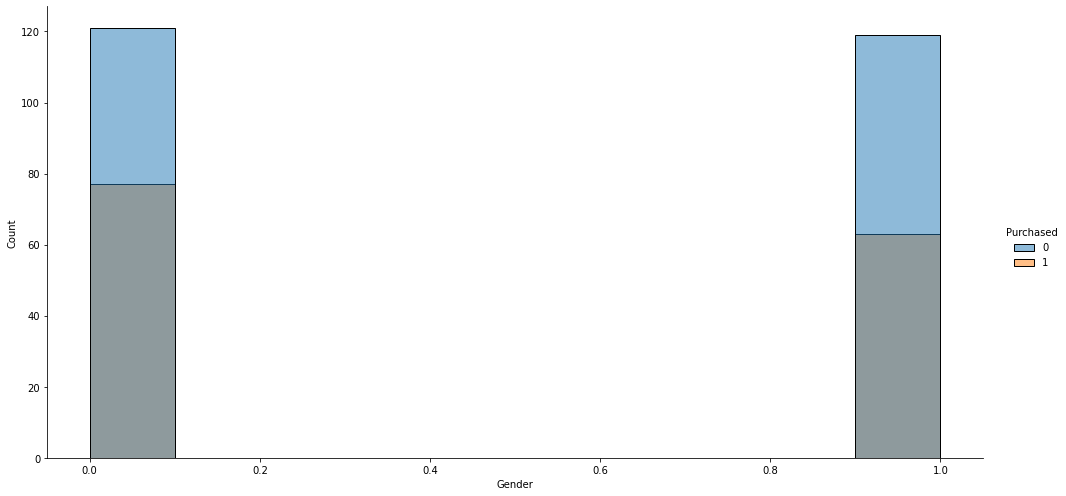

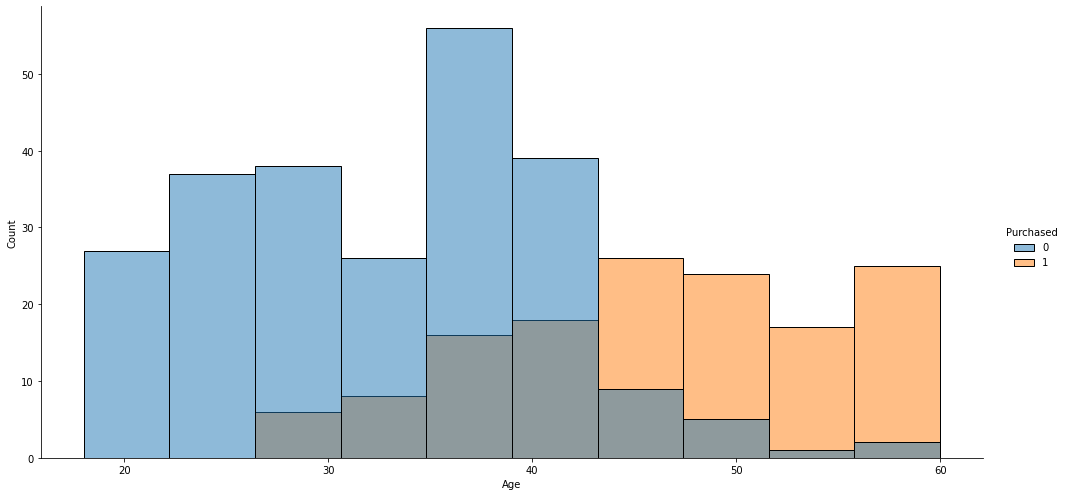

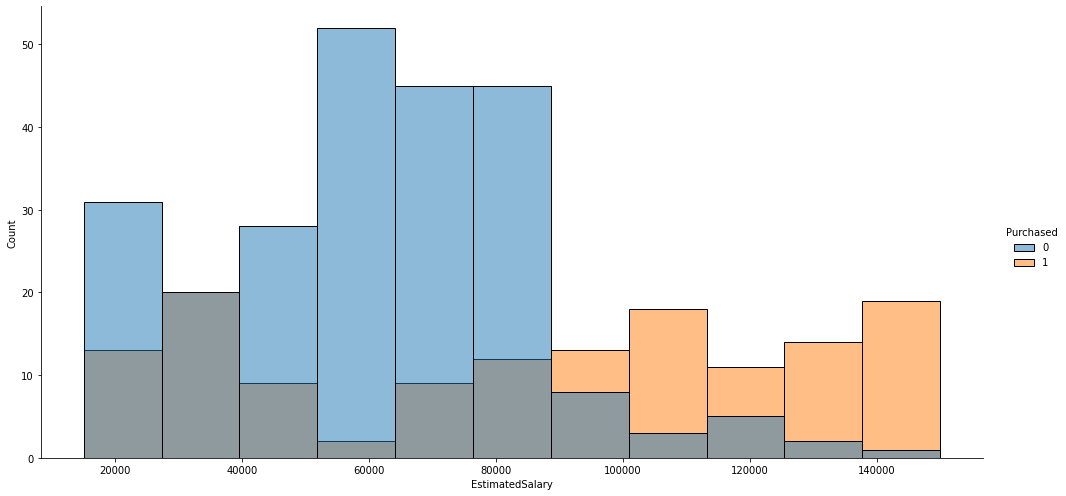

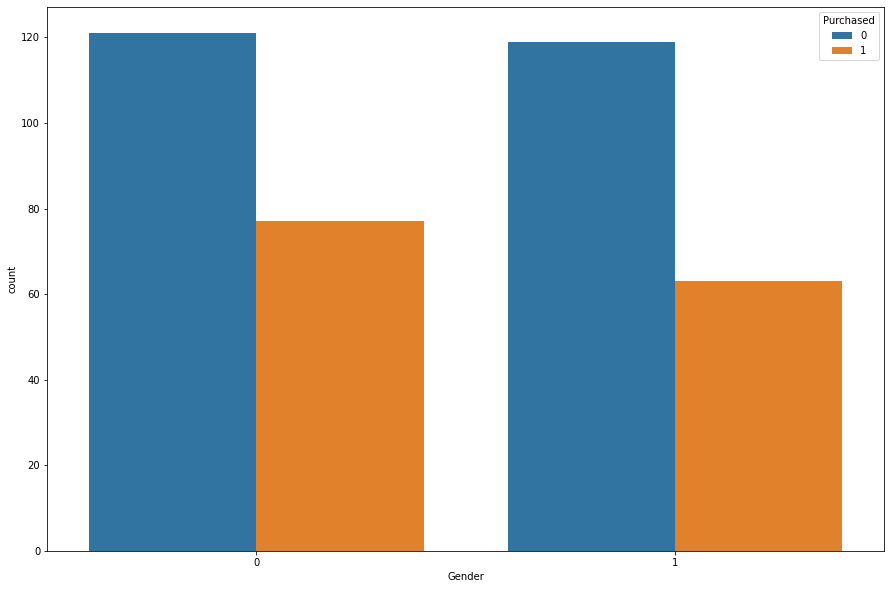

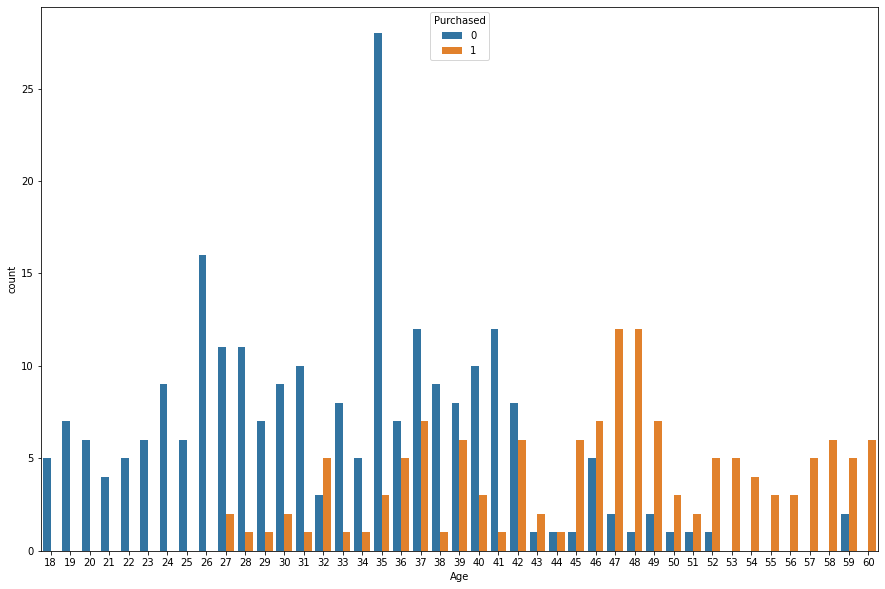

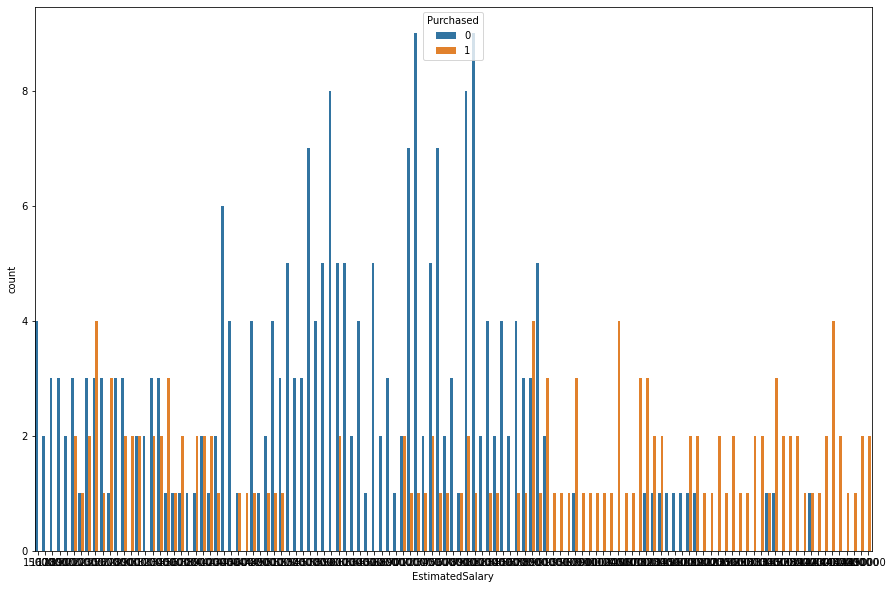

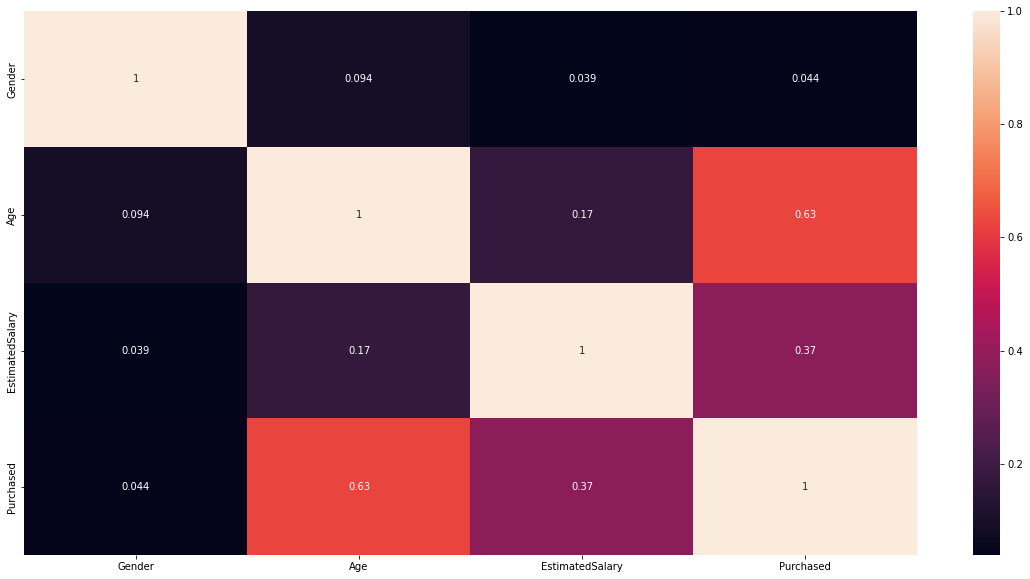

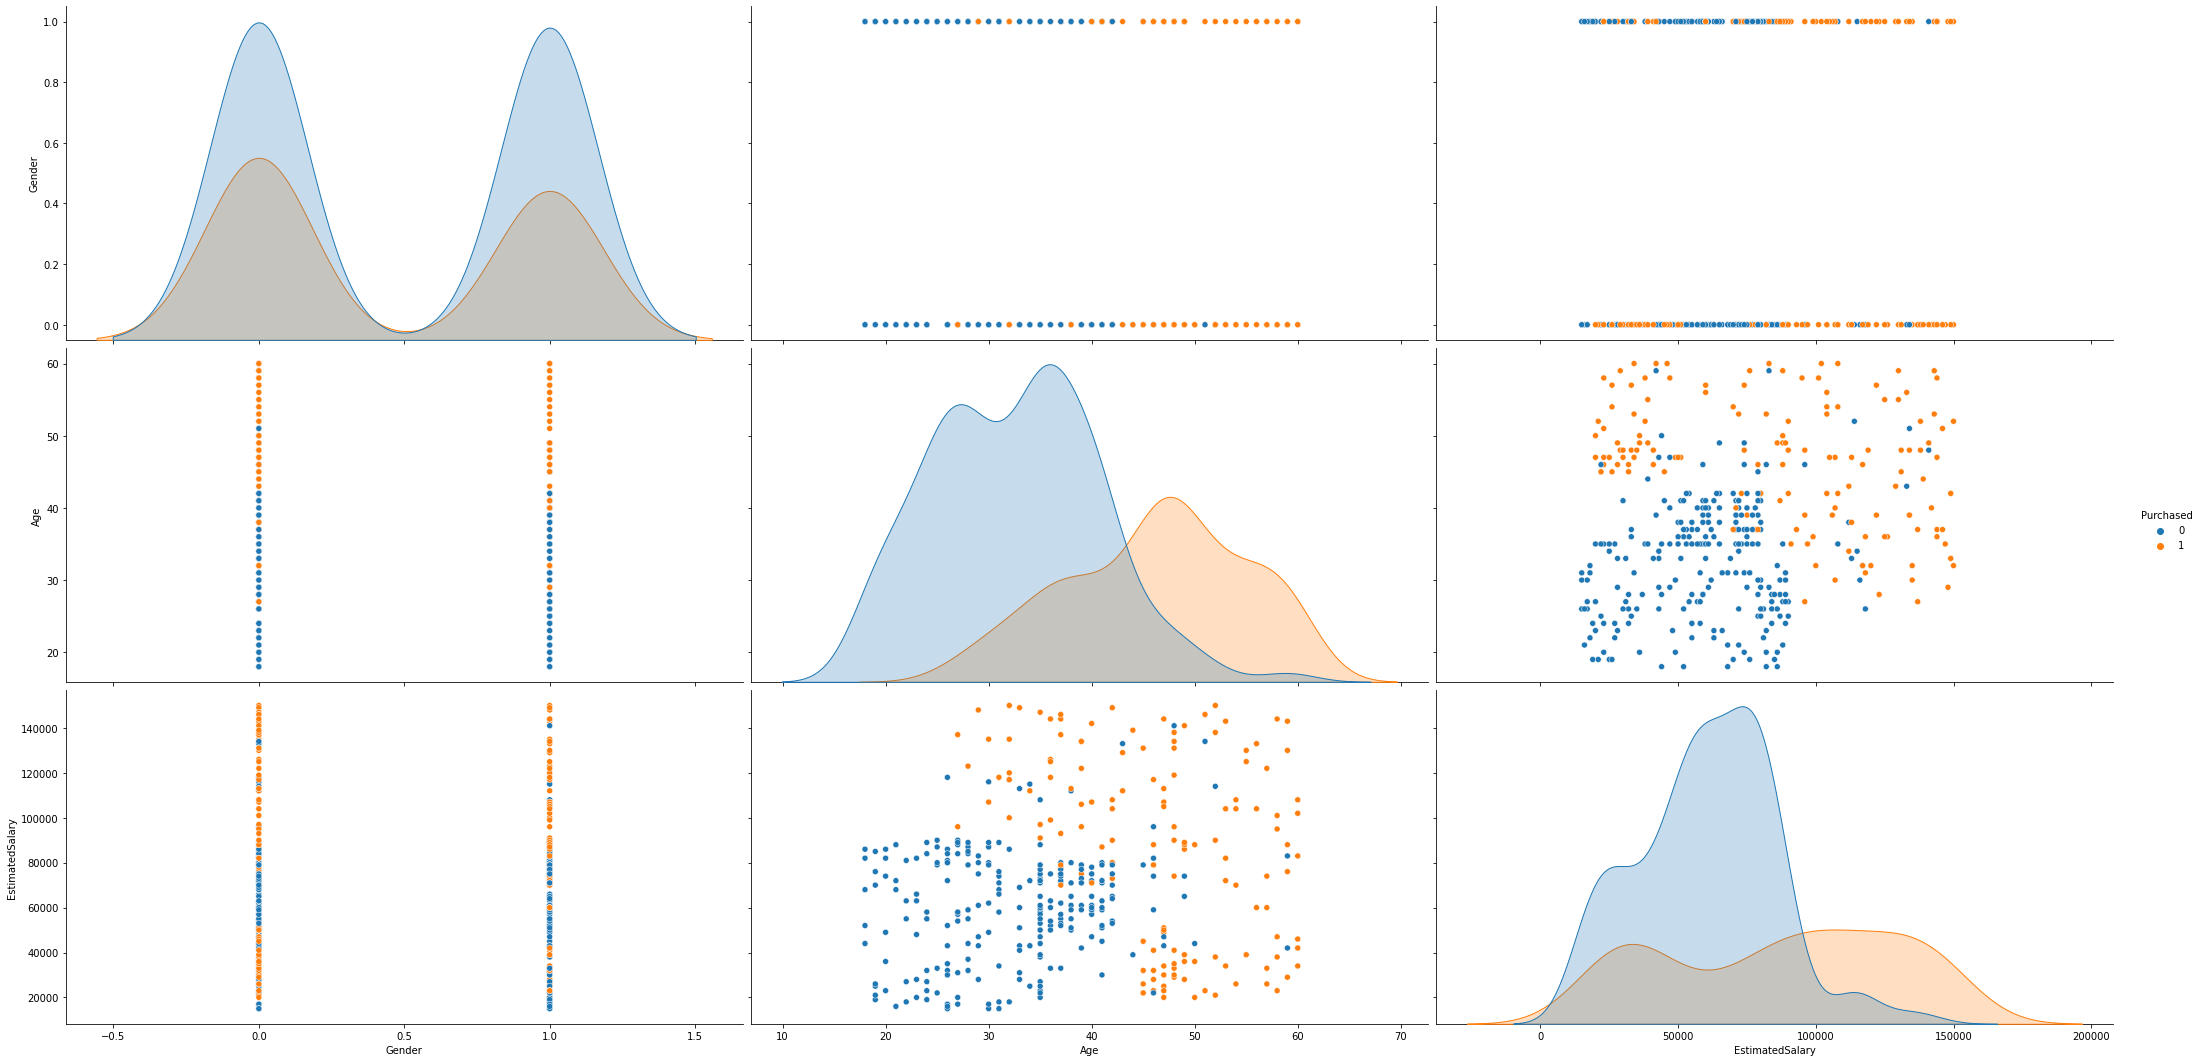

In [16]:
EDA(df_clean,features,"Purchased")

# **4. Splitting the data**

In [17]:
def split(data,feature,target):
  from sklearn.model_selection import train_test_split
  X=data.loc[:,feature].values
  y=data.loc[:,target].values
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=3797)# spliting the data
  return X_train, X_test, y_train, y_test

In [18]:
X_train, X_test, y_train, y_test=split(df_clean,features,"Purchased")
print(X_train, X_test, y_train, y_test)

[[     0     24  32000]
 [     0     23  28000]
 [     1     30  49000]
 [     1     26  81000]
 [     0     32 117000]
 [     1     20  74000]
 [     0     34  72000]
 [     0     38  65000]
 [     1     39  77000]
 [     1     59 143000]
 [     1     39  71000]
 [     1     35  91000]
 [     1     60  34000]
 [     1     45  26000]
 [     1     60 102000]
 [     0     34  43000]
 [     1     29 148000]
 [     1     49  65000]
 [     0     39  73000]
 [     1     36  52000]
 [     0     35  50000]
 [     0     27  58000]
 [     1     30  89000]
 [     1     26  86000]
 [     0     20  36000]
 [     1     60  83000]
 [     0     35  97000]
 [     1     18  82000]
 [     1     47 105000]
 [     0     18  86000]
 [     0     35  72000]
 [     0     45 131000]
 [     1     27  58000]
 [     0     26  43000]
 [     0     59  83000]
 [     0     57  33000]
 [     0     42 108000]
 [     0     49 141000]
 [     0     60  46000]
 [     0     27  57000]
 [     0     23  66000]
 [     0     46 

# **5. Scaling the data**

In [19]:
def scaling(train,test):
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler() #scaling the data  
  X_train_scale=scaler.fit_transform(train) 
  X_test_scale=scaler.transform(test)
  return X_train_scale,X_test_scale

In [20]:
X_train_scale,X_test_scale=scaling(X_train,X_test)
#print(X_train_scale,X_test_scale)

# **6. Build the model**

In [21]:
pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score,roc_auc_score

# **i) Logistic Regression algorithm (ASSIGNMENT 12-LOGISTIC REGRESSION)**

In [23]:
def Logistic_regression (X_train, X_test, y_train, y_test):
  log=LogisticRegression(random_state=3797) # logistic model for the data
  log.fit(X_train, y_train)
  y_predict_log=log.predict(X_test)
  result_L= pd.DataFrame({'actual': y_test, 'predict': y_predict_log})
  score_L=accuracy_score(y_test,y_predict_log)
  return y_predict_log,result_L,score_L,log

In [24]:
y_predict_log,result_L,score_L,log=Logistic_regression(X_train_scale, X_test_scale, y_train, y_test)
print(y_predict_log)
print(result_L)
print(' Score of LogisticRegression algorithmn is ', score_L)

[0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0
 1 0]
    actual  predict
0        0        0
1        0        0
2        0        0
3        0        0
4        0        1
..     ...      ...
71       0        0
72       0        0
73       0        0
74       1        1
75       0        0

[76 rows x 2 columns]
 Score of LogisticRegression algorithmn is  0.9210526315789473


# **ii) KNN classifier algorithm (ASSIGNMENT 13 - KNN CLASSIFIER)**

In [25]:
from pandas.core.common import random_state
def KNN_classifier(X_train, X_test, y_train, y_test,k):
  knn=KNeighborsClassifier(n_neighbors=k) # knn model for the data
  knn.fit(X_train, y_train)
  y_predict_knn=knn.predict(X_test)
  print('for ' ,k ,' value ',"Train Accuracy : ",round(knn.score(X_train,y_train),3),"Val Accuracy : ", round(np.mean(cross_val_score(knn, X_train, y_train, cv=10)),3)) # test the model and it computes the accuracy (train data accuracy)
  result_K= pd.DataFrame({'actual': y_test, 'predict': y_predict_knn})
  score_K=accuracy_score(y_test,y_predict_knn)
  return y_predict_knn,result_K,score_K,knn

In [26]:
for i in range (1,25):
  KNN_classifier(X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  0.997 Val Accuracy :  0.832
for  2  value  Train Accuracy :  0.908 Val Accuracy :  0.829
for  3  value  Train Accuracy :  0.928 Val Accuracy :  0.882
for  4  value  Train Accuracy :  0.911 Val Accuracy :  0.885
for  5  value  Train Accuracy :  0.905 Val Accuracy :  0.885
for  6  value  Train Accuracy :  0.911 Val Accuracy :  0.888
for  7  value  Train Accuracy :  0.911 Val Accuracy :  0.895
for  8  value  Train Accuracy :  0.911 Val Accuracy :  0.895
for  9  value  Train Accuracy :  0.908 Val Accuracy :  0.895
for  10  value  Train Accuracy :  0.901 Val Accuracy :  0.892
for  11  value  Train Accuracy :  0.898 Val Accuracy :  0.895
for  12  value  Train Accuracy :  0.898 Val Accuracy :  0.892
for  13  value  Train Accuracy :  0.898 Val Accuracy :  0.895
for  14  value  Train Accuracy :  0.905 Val Accuracy :  0.882
for  15  value  Train Accuracy :  0.901 Val Accuracy :  0.889
for  16  value  Train Accuracy :  0.895 Val Accuracy :  0.895
for  17  value  T

In [27]:
y_predict_knn,result_K,score_K,knn=KNN_classifier(X_train_scale, X_test_scale, y_train, y_test,7)
print(y_predict_knn)
print(result_K)
print(' Score of KNN classifier algorithmn is ', score_K)

for  7  value  Train Accuracy :  0.911 Val Accuracy :  0.895
[0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0
 1 0]
    actual  predict
0        0        0
1        0        0
2        0        0
3        0        0
4        0        1
..     ...      ...
71       0        0
72       0        0
73       0        0
74       1        1
75       0        0

[76 rows x 2 columns]
 Score of KNN classifier algorithmn is  0.9342105263157895


# **iii)Decision Tree algorithm (ASSIGNMENT 14 -DECISION TREE CLASSIFIER)**

In [28]:
def DecisionTree (X_train, X_test, y_train, y_test,depth):
  dt=DecisionTreeClassifier(max_depth= depth,random_state=3797) # decision tree model for the data
  dt.fit(X_train, y_train)
  y_predict_dt=dt.predict(X_test)
  result_D= pd.DataFrame({'actual': y_test, 'predict': y_predict_dt})
  score_D=accuracy_score(y_test,y_predict_dt)
  print('for ' ,depth ,' value ',"Train Accuracy : ",round(accuracy_score(y_train,dt.predict(X_train)),3),"Val Accuracy : ", round(np.mean(cross_val_score(dt, X_train, y_train, cv=10,scoring='roc_auc')),3))
  return y_predict_dt,result_D,score_D,dt

In [29]:
for i in range(1,25):
  DecisionTree (X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  0.829 Val Accuracy :  0.804
for  2  value  Train Accuracy :  0.895 Val Accuracy :  0.89
for  3  value  Train Accuracy :  0.895 Val Accuracy :  0.92
for  4  value  Train Accuracy :  0.921 Val Accuracy :  0.932
for  5  value  Train Accuracy :  0.938 Val Accuracy :  0.918
for  6  value  Train Accuracy :  0.957 Val Accuracy :  0.873
for  7  value  Train Accuracy :  0.97 Val Accuracy :  0.837
for  8  value  Train Accuracy :  0.98 Val Accuracy :  0.835
for  9  value  Train Accuracy :  0.987 Val Accuracy :  0.807
for  10  value  Train Accuracy :  0.987 Val Accuracy :  0.81
for  11  value  Train Accuracy :  0.993 Val Accuracy :  0.8
for  12  value  Train Accuracy :  0.997 Val Accuracy :  0.798
for  13  value  Train Accuracy :  0.997 Val Accuracy :  0.813
for  14  value  Train Accuracy :  0.997 Val Accuracy :  0.813
for  15  value  Train Accuracy :  0.997 Val Accuracy :  0.813
for  16  value  Train Accuracy :  0.997 Val Accuracy :  0.813
for  17  value  Train Ac

In [30]:
y_predict_dt,result_D,score_D,dt=DecisionTree (X_train_scale, X_test_scale, y_train, y_test,4)
print(y_predict_dt)
print(result_D)
print(' Score of Decision Tree algorithmn is ', score_D)

for  4  value  Train Accuracy :  0.921 Val Accuracy :  0.932
[0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0
 1 0]
    actual  predict
0        0        0
1        0        0
2        0        0
3        0        0
4        0        1
..     ...      ...
71       0        0
72       0        0
73       0        0
74       1        1
75       0        0

[76 rows x 2 columns]
 Score of Decision Tree algorithmn is  0.9473684210526315


# **iv)Random Forest Classifier (ASSIGNMENT 15 - RANDOM FOREST CLASSIFIER)**

In [31]:
def Random_forest(X_train, X_test, y_train, y_test,N):
  rfc=RandomForestClassifier(max_depth= 2,n_estimators=N,random_state=3797,max_features='sqrt') # Random forest model for the data
  rfc.fit(X_train, y_train)
  y_predict_rfc=rfc.predict(X_test)
  result_R= pd.DataFrame({'actual': y_test, 'predict': y_predict_rfc})
  score_R=accuracy_score(y_test,y_predict_rfc)
  print('for n_estimators' ,N ,' value ',"Train Accuracy : ",round(accuracy_score(y_train,rfc.predict(X_train)),3),"Val Accuracy : ", round(np.mean(cross_val_score(rfc, X_train, y_train, cv=10,scoring='roc_auc')),3))
  return y_predict_rfc,result_R,score_R,rfc

In [32]:
for i in [10,11,12,13,14,15,16,17,18,19,20]:
  Random_forest(X_train_scale, X_test_scale, y_train, y_test,i)

for n_estimators 10  value  Train Accuracy :  0.839 Val Accuracy :  0.939
for n_estimators 11  value  Train Accuracy :  0.839 Val Accuracy :  0.939
for n_estimators 12  value  Train Accuracy :  0.839 Val Accuracy :  0.94
for n_estimators 13  value  Train Accuracy :  0.839 Val Accuracy :  0.939
for n_estimators 14  value  Train Accuracy :  0.882 Val Accuracy :  0.935
for n_estimators 15  value  Train Accuracy :  0.852 Val Accuracy :  0.936
for n_estimators 16  value  Train Accuracy :  0.888 Val Accuracy :  0.936
for n_estimators 17  value  Train Accuracy :  0.908 Val Accuracy :  0.937
for n_estimators 18  value  Train Accuracy :  0.875 Val Accuracy :  0.937
for n_estimators 19  value  Train Accuracy :  0.905 Val Accuracy :  0.936
for n_estimators 20  value  Train Accuracy :  0.908 Val Accuracy :  0.937


In [33]:
y_predict_rfc,result_R,score_R,rfc=Random_forest(X_train_scale, X_test_scale, y_train, y_test,100)
print(y_predict_rfc)
print(result_R)
print(' Score of random forest algorithmn is ', score_R)

for n_estimators 100  value  Train Accuracy :  0.901 Val Accuracy :  0.928
[0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0
 1 0]
    actual  predict
0        0        0
1        0        0
2        0        0
3        0        0
4        0        1
..     ...      ...
71       0        0
72       0        0
73       0        0
74       1        1
75       0        0

[76 rows x 2 columns]
 Score of random forest algorithmn is  0.9473684210526315


# **v) Xg boost classifier algorithm ( ASSIGNMENT 16 - XGBOOST CLASSIFIER)**

In [34]:
import warnings
import xgboost as xgb
warnings.filterwarnings('ignore')

In [35]:
def XgBoost(X_train, X_test, y_train, y_test,lr):
  Xgb=xgb.XGBClassifier(learning_rate=lr,n_estimators= 100,random_state=3797) # Xgboost model for the data
  Xgb.fit(X_train, y_train)
  y_predict_Xgb=Xgb.predict(X_test)
  result_X= pd.DataFrame({'actual': y_test, 'predict': y_predict_Xgb})
  score_X=accuracy_score(y_test,y_predict_Xgb)
  print('for n_estimators' ,lr ,' value ',"Train Accuracy : ",round(accuracy_score(y_train,Xgb.predict(X_train)),6),"Val Accuracy : ", round(np.mean(cross_val_score(Xgb, X_train, y_train, cv=10,scoring='roc_auc')),6))
  return y_predict_Xgb,result_X,score_X,Xgb

In [36]:
for i in np.arange(0.01,0.20,0.01):
  XgBoost(X_train_scale, X_test_scale, y_train, y_test,i)

for n_estimators 0.01  value  Train Accuracy :  0.914474 Val Accuracy :  0.930574
for n_estimators 0.02  value  Train Accuracy :  0.914474 Val Accuracy :  0.943003
for n_estimators 0.03  value  Train Accuracy :  0.914474 Val Accuracy :  0.946723
for n_estimators 0.04  value  Train Accuracy :  0.924342 Val Accuracy :  0.946485
for n_estimators 0.05  value  Train Accuracy :  0.934211 Val Accuracy :  0.944347
for n_estimators 0.060000000000000005  value  Train Accuracy :  0.934211 Val Accuracy :  0.946197
for n_estimators 0.06999999999999999  value  Train Accuracy :  0.9375 Val Accuracy :  0.947397
for n_estimators 0.08  value  Train Accuracy :  0.9375 Val Accuracy :  0.947373
for n_estimators 0.09  value  Train Accuracy :  0.9375 Val Accuracy :  0.946635
for n_estimators 0.09999999999999999  value  Train Accuracy :  0.940789 Val Accuracy :  0.945694
for n_estimators 0.11  value  Train Accuracy :  0.944079 Val Accuracy :  0.943421
for n_estimators 0.12  value  Train Accuracy :  0.944079 V

In [37]:
y_predict_Xgb,result_X,score_X,Xgb=XgBoost(X_train_scale, X_test_scale, y_train, y_test,0.07)
print(y_predict_Xgb)
print(result_X)
print(' Score of Xgboost algorithmn is ', score_X)

for n_estimators 0.07  value  Train Accuracy :  0.9375 Val Accuracy :  0.947397
[0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 1 0]
    actual  predict
0        0        0
1        0        0
2        0        0
3        0        0
4        0        0
..     ...      ...
71       0        0
72       0        0
73       0        0
74       1        1
75       0        0

[76 rows x 2 columns]
 Score of Xgboost algorithmn is  0.9210526315789473


# **vi) Voting Classifier algorithm**

In [38]:
from sklearn.ensemble import VotingClassifier

In [39]:
def Voting_Classifier(X_train, X_test, y_train, y_test,m1,m2,m3,m4,m5):
  vot=VotingClassifier(estimators= [('LR',m1),('KNN',m2),('DT',m3),('RF',m4),('XGB',m5)],voting='soft') # Voting classifier model for the data
  vot.fit(X_train, y_train)
  y_predict_vot=vot.predict(X_test)
  result_V= pd.DataFrame({'actual': y_test, 'predict': y_predict_vot})
  score_V=accuracy_score(y_test,y_predict_vot)
  print('for estimators 5 models value ',"Train Accuracy : ",round(accuracy_score(y_train,vot.predict(X_train)),6),"Val Accuracy : ", round(np.mean(cross_val_score(vot, X_train, y_train, cv=10,scoring='roc_auc')),6))
  return y_predict_vot,result_V,score_V,vot

In [40]:
y_predict_vot,result_V,score_V,vot=Voting_Classifier(X_train_scale, X_test_scale, y_train, y_test,log,knn,dt,rfc,Xgb)
print(y_predict_vot)
print(result_V)
print(' Score of Voting classifier algorithmn is ', score_V)

for estimators 5 models value  Train Accuracy :  0.921053 Val Accuracy :  0.948239
[0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0
 1 0]
    actual  predict
0        0        0
1        0        0
2        0        0
3        0        0
4        0        1
..     ...      ...
71       0        0
72       0        0
73       0        0
74       1        1
75       0        0

[76 rows x 2 columns]
 Score of Voting classifier algorithmn is  0.9473684210526315


# **7.  Evaluation metrics**

In [73]:
def evaluate(mod,X_test,y_test,predict):
  acc=accuracy_score(y_test,predict)
  roc=roc_auc_score(y_test,predict)
  plt.figure(figsize=(20,10))
  plot_roc_curve(mod,X_test,y_test)
  plt.show()
  print('accuracy score of ',mod,' : ', acc)
  print('AUROC  score of ',mod,': ', roc)


# **i) Evaluation metric for logistic regression algorithm**

In [74]:
def confuse_matrix(test,predict):
  cm = confusion_matrix(test,predict)
  return cm

In [75]:
cm_log=confuse_matrix(y_test,y_predict_log)
cm_log

array([[50,  2],
       [ 4, 20]])

<Figure size 1440x720 with 0 Axes>

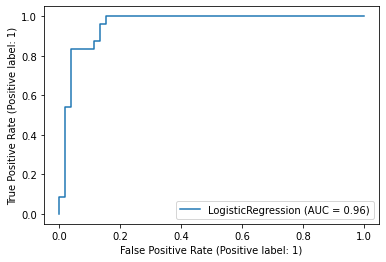

accuracy score of  LogisticRegression(random_state=3797)  :  0.9210526315789473
AUROC  score of  LogisticRegression(random_state=3797) :  0.8974358974358976


In [76]:
evaluate(log,X_test_scale,y_test,y_predict_log)

In [77]:
def PlotDecisionRegion(mod):
  X=df_clean.loc[:,['Age','EstimatedSalary']].values
  y=df_clean.loc[:,'Purchased'].values
  model=mod
  model.fit(X,y)
  plt.figure(figsize=(15,10))
  plot_decision_regions(X,y,model,legend=2)

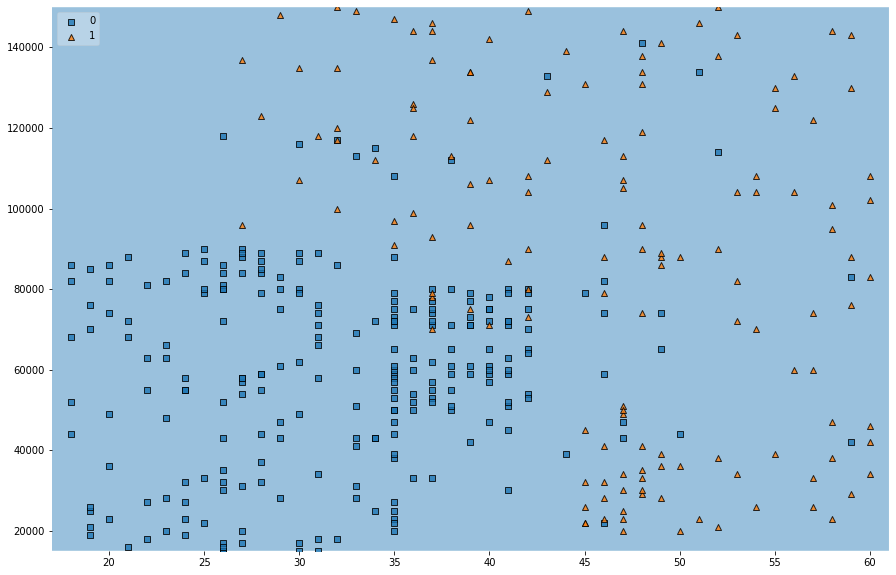

In [46]:
PlotDecisionRegion(LogisticRegression())

In [47]:
print('error rate of model is : ',np.mean(y_predict_log!=y_test))

error rate of model is :  0.07894736842105263


# **ii) Evaluation metric for KNN classifier algorithm**

In [48]:
cm_knn=confuse_matrix(y_test,y_predict_knn)
cm_knn

array([[48,  4],
       [ 1, 23]])

<Figure size 1440x720 with 0 Axes>

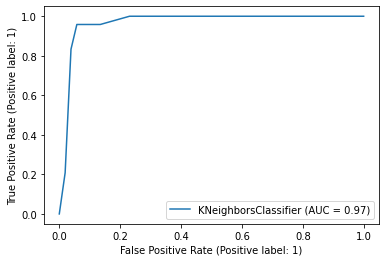

accuracy score of  KNeighborsClassifier(n_neighbors=7)  :  0.9342105263157895
AUROC  score of  KNeighborsClassifier(n_neighbors=7) :  0.9407051282051283


In [78]:
evaluate(knn,X_test_scale,y_test,y_predict_knn)

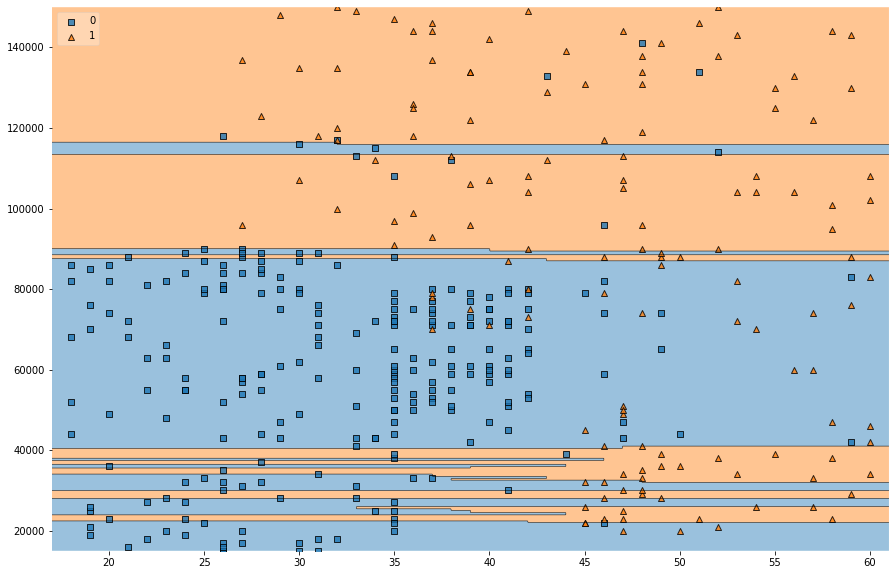

In [50]:
PlotDecisionRegion(KNeighborsClassifier(n_neighbors=7))

In [51]:
print('error rate of model is : ',np.mean(y_predict_knn!=y_test))

error rate of model is :  0.06578947368421052


# **iii) Evaluation metric for Decision Tree classifier algorithm**

In [52]:
cm_dt=confuse_matrix(y_test,y_predict_dt)
cm_dt

array([[49,  3],
       [ 1, 23]])

<Figure size 1440x720 with 0 Axes>

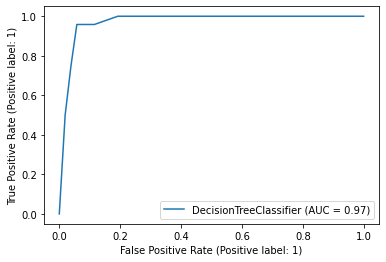

accuracy score of  DecisionTreeClassifier(max_depth=4, random_state=3797)  :  0.9473684210526315
AUROC  score of  DecisionTreeClassifier(max_depth=4, random_state=3797) :  0.9503205128205129


In [79]:
evaluate(dt,X_test_scale,y_test,y_predict_dt)

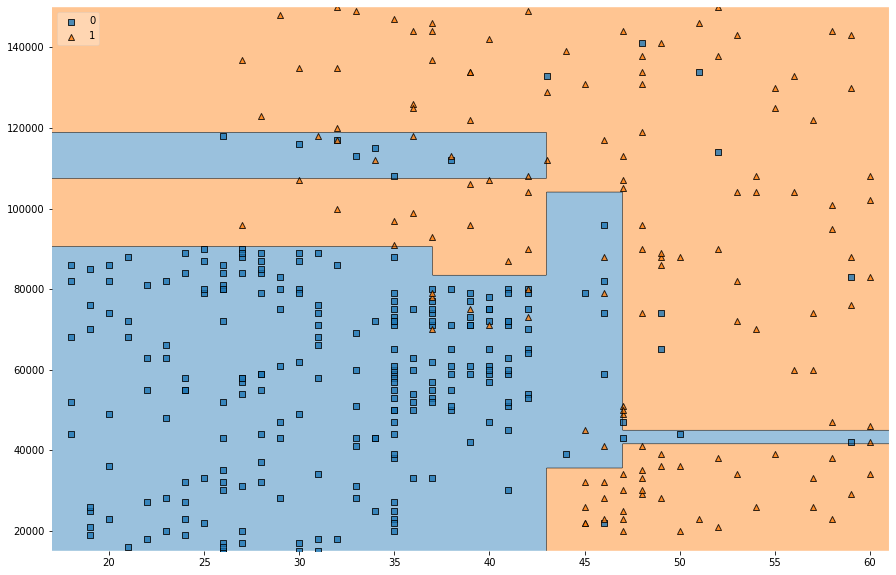

In [54]:
PlotDecisionRegion(DecisionTreeClassifier(max_depth=4))

In [55]:
from sklearn import tree

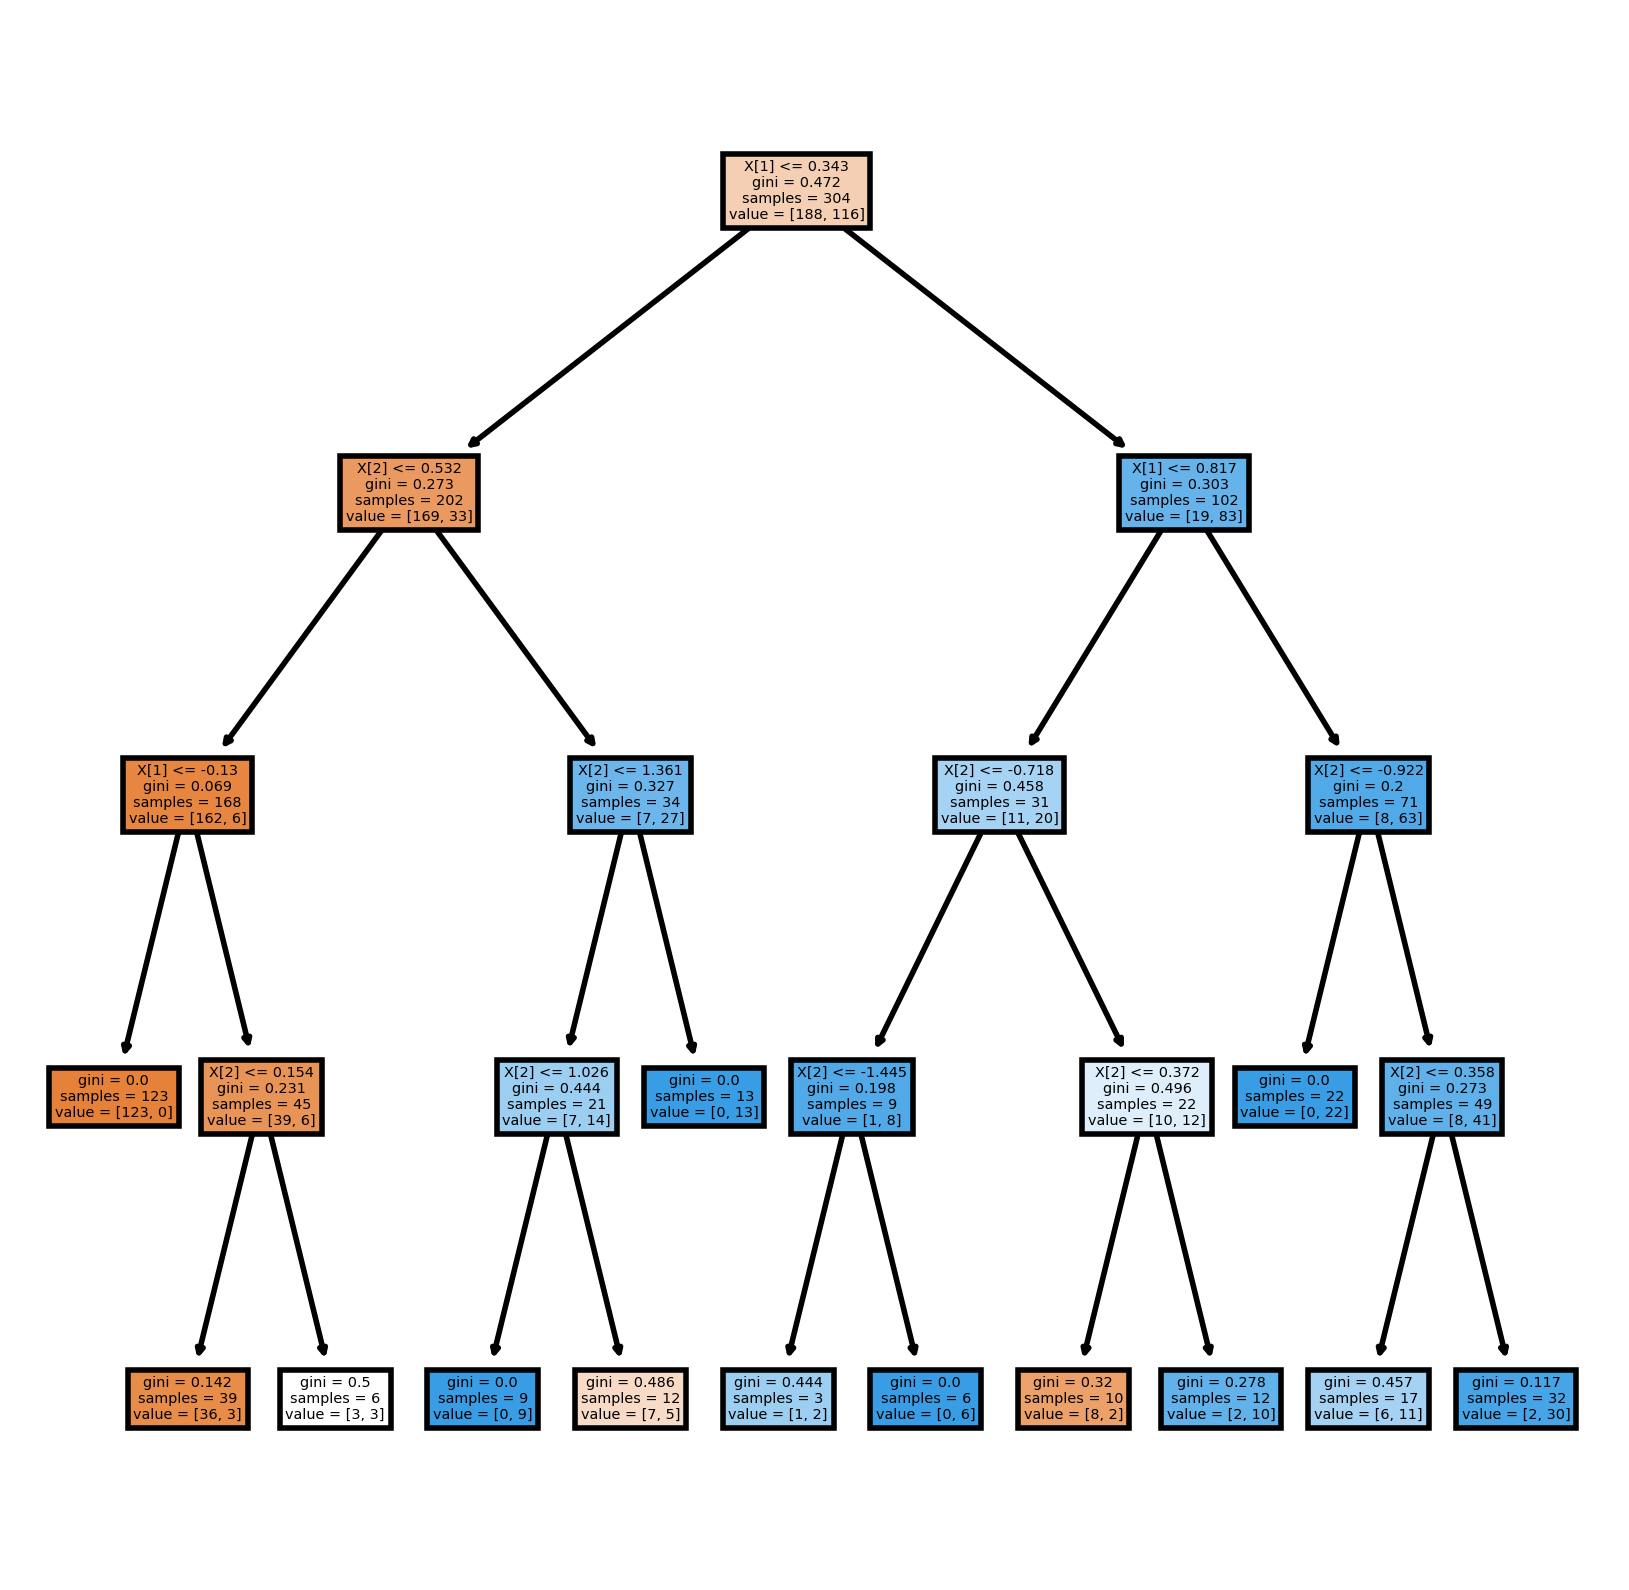

In [56]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=400)
tree.plot_tree(dt,filled = True);
fig.savefig('imagename.png')

In [57]:
print('error rate of model is : ',np.mean(y_predict_dt!=y_test))

error rate of model is :  0.05263157894736842


In [58]:
importance = dt.feature_importances_
importance
list(zip(importance,df_clean.columns))

[(0.0, 'Gender'),
 (0.5562912142591324, 'Age'),
 (0.44370878574086764, 'EstimatedSalary')]

# **iv)Evaluation Metric for random classifier algorithm**

In [59]:
cm_rfc=confuse_matrix(y_test,y_predict_rfc)
cm_rfc

array([[49,  3],
       [ 1, 23]])

<Figure size 1440x720 with 0 Axes>

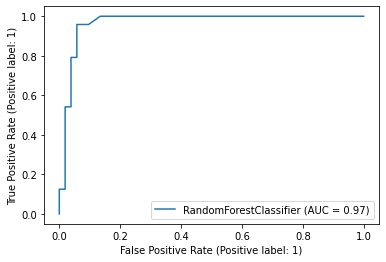

accuracy score of  RandomForestClassifier(max_depth=2, max_features='sqrt', random_state=3797)  :  0.9473684210526315
AUROC  score of  RandomForestClassifier(max_depth=2, max_features='sqrt', random_state=3797) :  0.9503205128205129


In [80]:
evaluate(rfc,X_test_scale,y_test,y_predict_rfc)

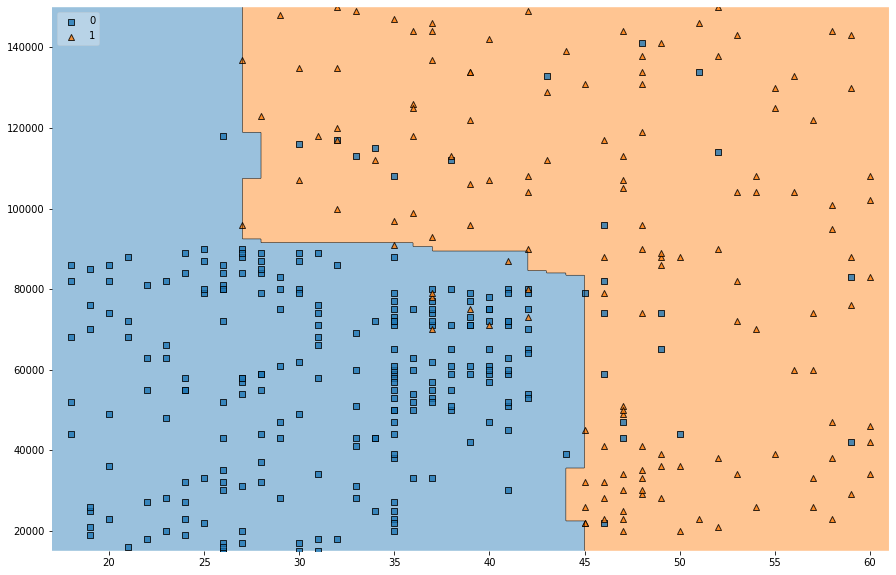

In [61]:
PlotDecisionRegion(RandomForestClassifier(n_estimators=15,max_depth=4,min_samples_split=3))

In [62]:
print('error rate of model is : ',np.mean(y_predict_rfc!=y_test))

error rate of model is :  0.05263157894736842


In [63]:
from sklearn.tree import export_graphviz
import pydot
Tree=rfc.estimators_[8]
export_graphviz(Tree, out_file = 'tree.dot', feature_names = features, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [64]:
importance =rfc.feature_importances_
importance
list(zip(importance,df_clean.columns))

[(0.00664023926289053, 'Gender'),
 (0.5507860076931288, 'Age'),
 (0.4425737530439808, 'EstimatedSalary')]

# **v)Evaluation Metric for XgBoost Classifier algorithm**

In [65]:
cm_Xgb=confuse_matrix(y_test,y_predict_Xgb)
cm_Xgb

array([[50,  2],
       [ 4, 20]])

<Figure size 1440x720 with 0 Axes>

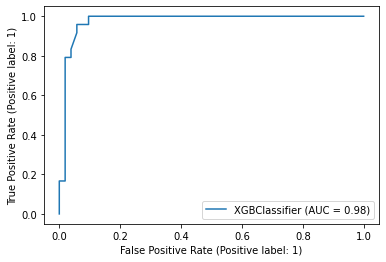

accuracy score of  XGBClassifier(learning_rate=0.07, random_state=3797)  :  0.9210526315789473
AUROC  score of  XGBClassifier(learning_rate=0.07, random_state=3797) :  0.8974358974358976


In [81]:
evaluate(Xgb,X_test_scale,y_test,y_predict_Xgb)

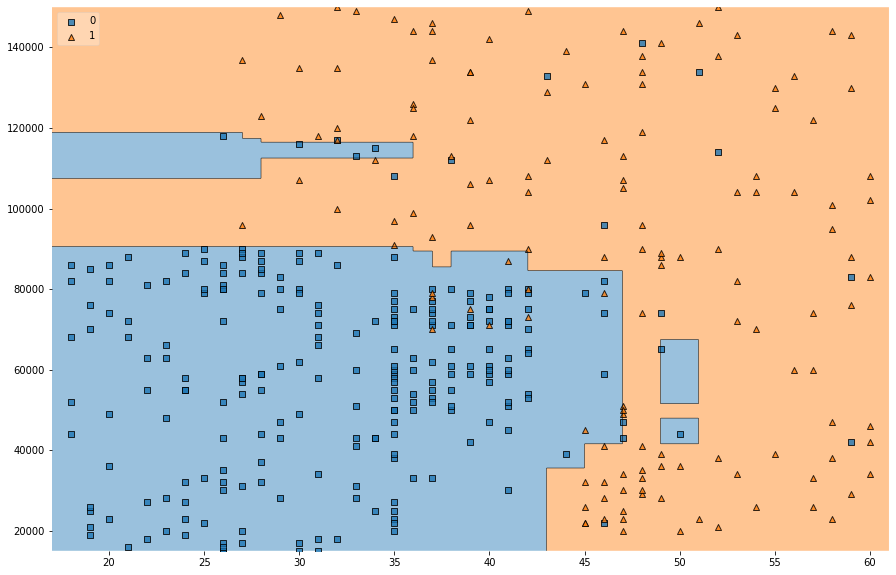

In [67]:
PlotDecisionRegion(xgb.XGBClassifier(learning_rate=0.07,n_estimators= 100,random_state=3797))

In [68]:
print('error rate of model is : ',np.mean(y_predict_Xgb!=y_test))

error rate of model is :  0.07894736842105263


# **vi)Evaluation Metric for VotingClassifier algorithm**

In [69]:
cm_vot=confuse_matrix(y_test,y_predict_vot)
cm_vot

array([[49,  3],
       [ 1, 23]])

<Figure size 1440x720 with 0 Axes>

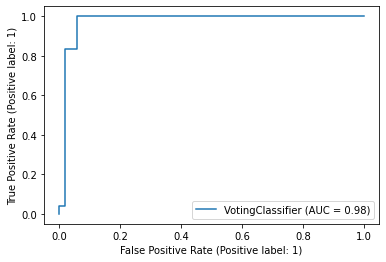

accuracy score of  VotingClassifier(estimators=[('LR', LogisticRegression(random_state=3797)),
                             ('KNN', KNeighborsClassifier(n_neighbors=7)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=4,
                                                     random_state=3797)),
                             ('RF',
                              RandomForestClassifier(max_depth=2,
                                                     max_features='sqrt',
                                                     random_state=3797)),
                             ('XGB',
                              XGBClassifier(learning_rate=0.07,
                                            random_state=3797))],
                 voting='soft')  :  0.9473684210526315
AUROC  score of  VotingClassifier(estimators=[('LR', LogisticRegression(random_state=3797)),
                             ('KNN', KNeighborsClassifier(n_neighbors=7)),
              

In [82]:
evaluate(vot,X_test_scale,y_test,y_predict_vot)

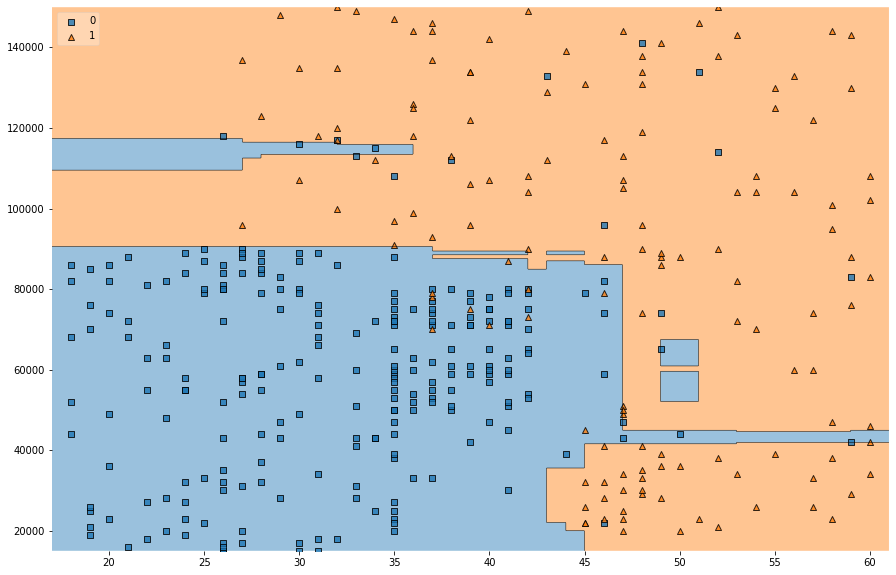

In [71]:
PlotDecisionRegion(VotingClassifier(estimators= [('LR',log),('KNN',knn),('DT',dt),('RF',rfc),('XGB',Xgb)],voting='soft'))

In [72]:
print('error rate of model is : ',np.mean(y_predict_vot!=y_test))

error rate of model is :  0.05263157894736842
